<a href="https://colab.research.google.com/github/SeonHyungJo/tensorflow-2.0-study/blob/master/Ch03_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_2_0_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.3.0


In [ ]:
# 난수 생성하기 (균일 분포)
rand = tf.random.uniform([1], 0, 1)
print(rand)

rand = tf.random.uniform([2, 2], 0, 10)
print(rand)

tf.Tensor([0.08484423], shape=(1,), dtype=float32)
tf.Tensor(
[[6.5726876 0.5125809]
 [4.1342545 9.3996105]], shape=(2, 2), dtype=float32)


In [ ]:
# 난수 생성하기 (정규 분포)
rand = tf.random.normal([8], 0, 1)  # shape, 평균, 표준편차
print(rand)

rand = tf.random.normal([8], 0, 8)  # shape, 평균, 표준편차
print(rand)

tf.Tensor(
[-0.6681988   1.0642408  -1.2878658  -0.6945073  -0.05861511  0.8283366
  1.8659431   0.5653516 ], shape=(8,), dtype=float32)
tf.Tensor(
[ 2.091843   7.2367835 -2.8270462  9.129341  -7.0864086 -6.308273
 -5.188529   5.821143 ], shape=(8,), dtype=float32)


뉴련은 입력, 가중치, 활성화함수, 출력으로 구성된다.

입력, 가중치, 출력은 보통 정수나 floar가 많이 쓰인다.
활성화 함수는 뉴런의 출력값을 정하는 함수이다.

간단한 형태의 뉴련은 입력에 가중치를 곱한 뒤 활성화함수를 취하면 출력을 얻을 수 있다.

뉴런이 학습을 할 때마다 바뀌는 것은 가중치이다. 처음에만 랜덤값이다.

## ReLU(Reactified Linear Unit)
정류된 선형 함수라는 뜻


In [ ]:
# 시그모이드 함수
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
x = 1
y = 0
w = tf.random.normal([1], 0 ,1)
output = sigmoid(x * w)
print(output)

0.7684111471596463


In [ ]:
# 경사 하강법
for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 -0.0016558785728908048 0.0016558785728908048
199 -0.0016289466374335875 0.0016289466374335875
299 -0.0016028770144650357 0.0016028770144650357
399 -0.0015776279819784916 0.0015776279819784916
499 -0.0015531612699765203 0.0015531612699765203
599 -0.0015294411061533737 0.0015294411061533737
699 -0.0015064347792923477 0.0015064347792923477
799 -0.0014841089103894709 0.0014841089103894709
899 -0.0014624351000095208 0.0014624351000095208
999 -0.0014413847918941707 0.0014413847918941707


In [ ]:
# 3.13
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


위에서 x가 0이기 때문에 이렇게 나오게 된다.

이런 경우를 방지하기 위해서 편향(bias)이라는 것을 뉴런에 넣어준다.


In [ ]:
# 편향을 추가한 예제
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = w + b * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.27460437364679846 0.7253956263532015
199 0.27460437364679846 0.7253956263532015
299 0.27460437364679846 0.7253956263532015
399 0.27460437364679846 0.7253956263532015
499 0.27460437364679846 0.7253956263532015
599 0.27460437364679846 0.7253956263532015
699 0.27460437364679846 0.7253956263532015
799 0.27460437364679846 0.7253956263532015
899 0.27460437364679846 0.7253956263532015
999 0.27460437364679846 0.7253956263532015


In [ ]:
# 첫번째 신경망 네트워크 AND
import numpy as np
# input
x = np.array([[1,1], [1,0], [0,1], [0,0]]) 
# output
y = np.array([[1], [0], [0], [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(1000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)



199 -0.11156489442178674
399 -0.06615271866880473
599 -0.04690477785714979
799 -0.03622737653554215
999 -0.029455278104784464


In [ ]:
# 두번째 신경망 네트워크 OR
import numpy as np
# input
x = np.array([[1,1], [1,0], [0,1], [0,0]]) 
# output
y = np.array([[1], [1], [1], [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.048105493788016346
399 -0.025493905004328174
599 -0.01722299654638619
799 -0.012958498459124473
999 -0.010367934805303486
1199 -0.008631784423839085
1399 -0.007389078437502
1599 -0.0064560695925113334
1799 -0.005731175940856089
1999 -0.0051502168540491985


In [ ]:
# 두번째 신경망 네트워크 OR 평가
import numpy as np
# input
x = np.array([[1,1], [1,0], [0,1], [0,0]]) 
# output
y = np.array([[1], [1], [1], [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for i in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print('X: ', x[i], 'Y :', y[i], 'Output', sigmoid(np.sum(x[i]*w) + b))
    print(i, error_sum)

In [ ]:
# 세 번째 신경망 네트워크 턖
import numpy as np
# input
x = np.array([[1,1], [1,0], [0,1], [0,0]]) 
# output
y = np.array([[0], [1], [1], [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.002926737234567822
399 -0.00011897379266634367
599 -4.8341061579249e-06
799 -2.084791538292663e-07
999 5.584263274016621e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [ ]:
# tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
# input
x = np.array([[1,1], [1,0], [0,1], [0,0]]) 
# output
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2765
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2712
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2688
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2667
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2648
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2633
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2617
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2604
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2586
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2578
Epoch 13/2000
4/4 [==============================

In [ ]:
# tf.keras를 이용한 2-레이어 XOR 네트워크 평가
model.predict(x)

array([[0.1695444 ],
       [0.84692085],
       [0.8471534 ],
       [0.11019477]], dtype=float32)

In [ ]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.8981564, -5.048081 ],
       [ 2.9033883, -5.0862775]], dtype=float32)>
<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([-4.444839 ,  1.4882206], dtype=float32)>
<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.590088 ],
       [-5.9835615]], dtype=float32)>
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([2.857563], dtype=float32)>


# 시각화 기초
matplotlib.pyplot

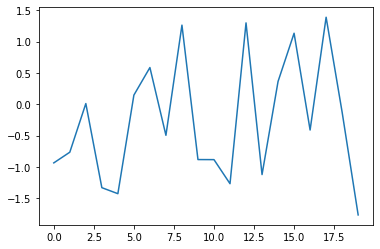

In [ ]:
# 간단한 꺽은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)

plt.plot(x,y)
plt.show()

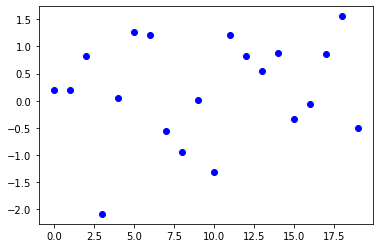

In [ ]:
# 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)

plt.plot(x,y, 'bo')
plt.show()

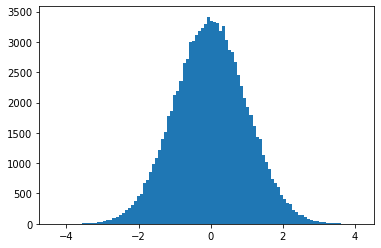

In [ ]:
# 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000], 0, 1)

plt.hist(random_normal, bins=100)
plt.show()

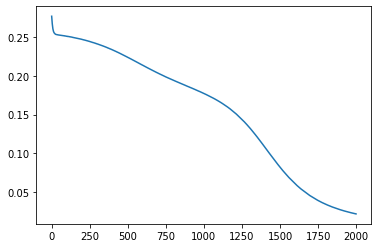

In [ ]:
# XOR 네트워크의 손실 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])